# Course Titel: Data Mining Lab
# Course Code: CSE 426
#-----------------------------------------------------------------------


# Submitted By
**Name:** MD. Tanvir Hasan Jewel

**ID:** 212 505 1038

**Section:** 8A

**Batch:** 50th

**Semester:** Spring 2025

**Department:** CSE

#Supervised By:

**Lecturer** Mrinmoy Biswas Akash,

Lecturer

**Department of:** Computer Science & Engineering,

University of Information Technology and Sciences (UITS)
  
**Date:** 06 July, 2025


**Project 03**


Project Title:Building a Domain-Specific Search Engine with Crawling and Link Analysis

Objective:To design and implement a basic domain-specific search engine by:
- Crawling webpages from a selected domain
- Building an inverted index and web connection graph
- Implementing a search mechanism using PageRank or HITS

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = stopwords.words('english')
print(STOPWORDS)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from collections import defaultdict
inverted_index = defaultdict(set)

In [ ]:
import re

def clean_and_tokenize(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())  # Remove punctuation and lowercase
    tokens = text.split()
    return [t for t in tokens if t not in STOPWORDS and len(t) > 1]

In [ ]:
#Step 1–3:
seed_urls = [
    "https://www.goal.com",
    "https://www.skysports.com/football",
    "https://www.espn.com/soccer/",
    "https://www.bbc.com/sport/football",
    "https://www.fifa.com",
    "https://www.premierleague.com",
    "https://www.uefa.com",
    "https://www.football-italia.net",
    "https://www.bundesliga.com",
    "https://www.laliga.com",
    "https://www.mlssoccer.com",
    "https://www.si.com/soccer",
    "https://www.foxsports.com/soccer",
    "https://www.cbssports.com/soccer/",
    "https://www.soccernews.com",
    "https://www.football365.com",
    "https://www.squawka.com",
    "https://www.whoscored.com"
]

In [ ]:
def crawl(url, base_domain, visited, limit):
    if len(visited) >= limit or url in visited:
        return

    try:
        response = requests.get(url, timeout=5)
        if response.status_code != 200:
            return
    except requests.RequestException:
        return


In [ ]:
def crawl_roots(root_urls, max_per_root=10):
    for root in root_urls:
        print(f"\nStarting crawl from: {root}")
        domain = urlparse(root).netloc
        visited = set()
        crawl(root, domain, visited, max_per_root)

In [ ]:
# Step 4: Structures
inverted_index = defaultdict(set)
web_connection = defaultdict(set)
visited = set()

def normalize_url(url):
    return url.split('#')[0].rstrip('/')

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

def crawl_roots(seed_urls, crawl_limit=100, visit_limit=100):
    queue = deque(seed_urls)
    count = 0

    while queue and count < visit_limit:
        url = normalize_url(queue.popleft())
        if url in visited:
            continue
        try:
            resp = requests.get(url, timeout=5)
            if 'text/html' not in resp.headers.get('Content-Type', ''):
                continue
            soup = BeautifulSoup(resp.text, 'html.parser')
            text = soup.get_text(separator=' ')
            words = tokenize(text)
            for word in words:
                inverted_index[word].add(url)

            for link_tag in soup.find_all('a', href=True):
                full_url = normalize_url(urljoin(url, link_tag['href']))
                if full_url.startswith('http'):
                    web_connection[url].add(full_url)
                    if len(visited) + len(queue) < crawl_limit:
                        queue.append(full_url)
            visited.add(url)
            count += 1
        except Exception:
            continue

In [ ]:
#Crawl with limit
crawl_roots(seed_urls, max_per_root=12)

#Print sample outputs
print("\nSample Inverted Index (first 12 words):")
for word in list(inverted_index.keys())[:12]:
    print(f"{word}: {list(inverted_index[word])}")

print("\nSample Web Connections (first 12):")
count = 0
for source, targets in web_connection.items():
    for target in targets:
        print(f"{source} -> {target}")
        count += 1
        if count >= 10:
            break
    if count >= 10:
        break


Starting crawl from: https://www.goal.com

Starting crawl from: https://www.skysports.com/football

Starting crawl from: https://www.espn.com/soccer/

Starting crawl from: https://www.bbc.com/sport/football

Starting crawl from: https://www.fifa.com

Starting crawl from: https://www.premierleague.com

Starting crawl from: https://www.uefa.com

Starting crawl from: https://www.football-italia.net

Starting crawl from: https://www.bundesliga.com

Starting crawl from: https://www.laliga.com

Starting crawl from: https://www.mlssoccer.com

Starting crawl from: https://www.si.com/soccer

Starting crawl from: https://www.foxsports.com/soccer

Starting crawl from: https://www.cbssports.com/soccer/

Starting crawl from: https://www.soccernews.com

Starting crawl from: https://www.football365.com

Starting crawl from: https://www.squawka.com

Starting crawl from: https://www.whoscored.com

Sample Inverted Index (first 12 words):

Sample Web Connections (first 12):


In [ ]:
# Run crawling
crawl_roots(seed_urls, crawl_limit=100, visit_limit=100)

# Step 5: Output results
print("Inverted Index Sample:")
for word in list(inverted_index.keys())[:15]:
    print(f"{word} -> {list(inverted_index[word])[:2]}")

print("\nWeb Connection Sample:")
for page in list(web_connection.keys())[:15]:
    print(f"{page} -> {list(web_connection[page])[:2]}")

Inverted Index Sample:
football -> ['https://www.laliga.com', 'https://www.goal.com/en/lists/lionel-messi-argentina-benefit-new-inter-miami-contract-barcelona-homecoming-2026-world-cup-perfect-sense/blt06fa704c27350233']
news -> ['https://www.laliga.com', 'https://www.goal.com/en/lists/lionel-messi-argentina-benefit-new-inter-miami-contract-barcelona-homecoming-2026-world-cup-perfect-sense/blt06fa704c27350233']
live -> ['https://www.cbssports.com/soccer', 'https://www.bbc.com/sport/football']
scores -> ['https://www.goal.com/en/team/manchester-united/6eqit8ye8aomdsrrq0hk3v7gh', 'https://www.goal.com/en/team/barcelona/agh9ifb2mw3ivjusgedj7c3fe']
results -> ['https://www.bbc.com/sport/football', 'https://www.football-italia.net']
transfers -> ['https://www.goal.com/en/team/manchester-united/6eqit8ye8aomdsrrq0hk3v7gh', 'https://www.goal.com/en/team/barcelona/agh9ifb2mw3ivjusgedj7c3fe']
goal -> ['https://www.goal.com/en/team/manchester-united/6eqit8ye8aomdsrrq0hk3v7gh', 'https://www.goal.c

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
edges_df = pd.read_csv('/content/drive/MyDrive/Data Mining/Week 09 -16-04-25/web_graph.csv')
content_df = pd.read_csv('/content/drive/MyDrive/Data Mining/Week 09 -16-04-25/web_content.csv')

In [ ]:
edges_df

,Source,Target
0,CodeAcademy.com,MLHub.com
1,DataScience101.com,DeepLearningCentral.com
2,MachineLearningMastery.com,AIWorld.com
3,PyProgramming.com,DataMiningExperts.com
4,DeepLearningCentral.com,DataMiningExperts.com
5,NeuralNetworksToday.com,BigDataSolutions.com
6,BigDataSolutions.com,MachineLearningMastery.com
7,AIWorld.com,CodeAcademy.com
8,MLHub.com,NeuralNetworksToday.com
9,DataScience101.com,AIWorld.com


In [ ]:
content_df

,Website,Content
0,CodeAcademy.com,Learn programming from scratch. Courses availa...
1,MLHub.com,The best platform for machine learning enthusi...
2,DataScience101.com,Introduction to data science concepts. Coverin...
3,PyProgramming.com,Master Python programming through tutorials an...
4,DeepLearningCentral.com,Deep learning tutorials with TensorFlow and Py...
5,DataMiningExperts.com,Explore data mining techniques such as classif...
6,AIWorld.com,Everything about artificial intelligence: neur...
7,MachineLearningMastery.com,Your guide to mastering machine learning with ...
8,BigDataSolutions.com,"Learn big data tools and techniques: Hadoop, S..."
9,NeuralNetworksToday.com,Get updated on the latest advancements in neur...


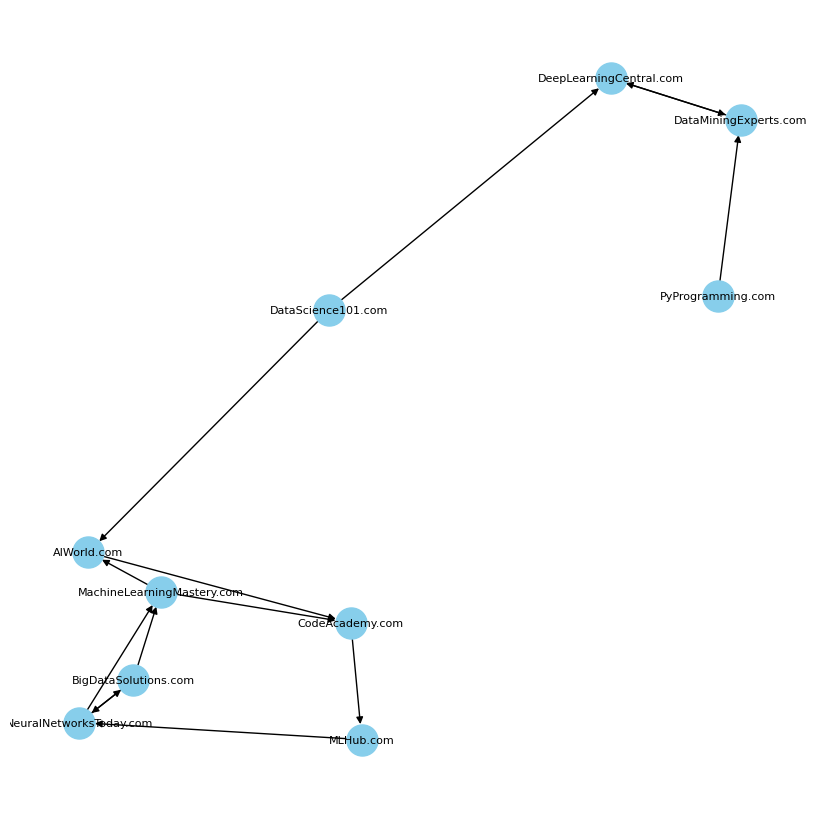

In [ ]:
#Step 6: Build the Web Graph
#Creatd directed graph
web_graph = nx.DiGraph()
for _, row in edges_df.iterrows():
    web_graph.add_edge(row["Source"], row["Target"])

#Build nodes and edges from web_connection
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
nx.draw(web_graph, with_labels=True, node_size=500, node_color="skyblue", font_size=8, font_color="black", arrowsize=10)
plt.show()

In [ ]:
#Step 7: Page Ranking Algorithms
#PageRank Scores
pagerank_scores = nx.pagerank(web_graph, alpha=0.85, max_iter=100, tol=1e-6)
print("\nPageRank Scores:", pagerank_scores)


PageRank Scores: {'CodeAcademy.com': 0.1203296561037154, 'MLHub.com': 0.11728020765387914, 'DataScience101.com': 0.015000000000000003, 'DeepLearningCentral.com': 0.16202484883598653, 'MachineLearningMastery.com': 0.11085647826428258, 'AIWorld.com': 0.06848900329502798, 'PyProgramming.com': 0.015000000000000003, 'DataMiningExperts.com': 0.1654751511640137, 'NeuralNetworksToday.com': 0.14775063486506868, 'BigDataSolutions.com': 0.07779401981802624}


In [ ]:
#HITS
# HITS scores
hubs, authorities = nx.hits(web_graph, max_iter=100, tol=1e-6)
print("\nHITS - Hub Scores:", hubs)
print("\nHITS - Authority Scores:", authorities)


HITS - Hub Scores: {'CodeAcademy.com': -0.0, 'MLHub.com': -4.471180935144949e-17, 'DataScience101.com': 0.35355339059327384, 'DeepLearningCentral.com': 3.25176795283269e-17, 'MachineLearningMastery.com': 0.35355339059327384, 'AIWorld.com': 0.14644660940672627, 'PyProgramming.com': 3.25176795283269e-17, 'DataMiningExperts.com': 0.14644660940672624, 'NeuralNetworksToday.com': -1.097471684081033e-16, 'BigDataSolutions.com': -1.1381187834914415e-16}

HITS - Authority Scores: {'CodeAcademy.com': 0.2928932188134526, 'MLHub.com': -0.0, 'DataScience101.com': -0.0, 'DeepLearningCentral.com': 0.29289321881345254, 'MachineLearningMastery.com': -1.3820013799538937e-16, 'AIWorld.com': 0.4142135623730952, 'PyProgramming.com': -0.0, 'DataMiningExperts.com': 6.503535905665382e-17, 'NeuralNetworksToday.com': -8.9423618702899e-17, 'BigDataSolutions.com': -8.129419882081727e-17}


In [ ]:
def search_engine(query, index, scores):
    query_terms = query.lower().split()
    results = set()
    for term in query_terms:
        if term in index:
            if not results:
                results = set(index[term])
            else:
                results = results.intersection(index[term])  # Find common websites

    # Sort results based on score
    ranked_results = []
    for website in results:
        if website in scores:
          ranked_results.append((website, scores[website]))
    ranked_results.sort(key=lambda x: x[1], reverse=True)

    return ranked_results

In [ ]:
crawl_roots()
web_graph = build_graph()

pagerank_scores = nx.pagerank(web_graph) if len(web_graph.nodes) > 0 else {}
_, authorities = nx.hits(web_graph) if len(web_graph.nodes) > 0 else ({}, {})


In [ ]:
#Step 8: Query Interface
query = "score"

print(f"\nSearch Results for '{query}' using PageRank:")
results = search_engine(query, inverted_index, pagerank_scores)
for page, score in results:
    print(f"{page}: {web_content.get(page, 'No summary')} ({score:.4f})")

print(f"\nSearch Results for '{query}' using HITS (Authorities):")
results = search_engine(query, inverted_index, authorities)
for page, score in results:
    print(f"{page}: {web_content.get(page, 'No summary')} ({score:.4f})")


Search Results for 'score' using PageRank:
https://www.goal.com/en: Football News, Live Scores, Results & Transfers | Goal.comSCORESLATEST Football NewsNewsTransfersOpinionAnalysisPlayer RatingsWinners & LosersPower RankingsEntertainmentCultureKits BootsTicketsBuyers' guidesGamingQuizzesSocialFacebookXInstagramTikTokYouTubeCOMPETITIONS LeaguesPremier LeagueLa LigaSe (0.0007)
https://www.goal.com/en/category/player-ratings/1/blt9e3963966f918671: Player ratings News, page 1 | Goal.comSCORESLATEST Football NewsNewsTransfersOpinionAnalysisPlayer RatingsWinners & LosersPower RankingsEntertainmentCultureKits BootsTicketsBuyers' guidesGamingQuizzesSocialFacebookXInstagramTikTokYouTubeCOMPETITIONS LeaguesPremier LeagueLa LigaSerie ABundesligaLigue (0.0007)
https://www.football-italia.net: Football Italia | Italian football news, analysis, fixtures and results for the latest from Serie A, Serie B and the Azzurri. - Football Italia                                                              Sk